###### Import Libraries

In [35]:
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score,classification_report

# For class imbalance
from imblearn.over_sampling import SMOTE

# Feature Selection 
from sklearn.feature_selection import VarianceThreshold
from sklearn import preprocessing
from sklearn.feature_selection import RFE

###### Load Data

In [2]:
df = pd.read_csv('../Data/Processed.csv')
df.head()

,year,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn,gender_code,multi_screen_code,mail_subscribed_code
0,2015,100198,409-8743,Female,36,62,no,no,148.35,12.2,16.81,82,1,4.0,1,0.0,0.0,0.0,0.0
1,2015,100643,340-5930,Female,39,149,no,no,294.45,7.7,33.37,87,3,3.0,2,0.0,0.0,0.0,0.0
2,2015,100756,372-3750,Female,65,126,no,no,87.30,11.9,9.89,91,1,4.0,5,1.0,0.0,0.0,0.0
3,2015,101595,331-4902,Female,24,131,no,yes,321.30,9.5,36.41,102,4,3.0,3,0.0,0.0,0.0,1.0
4,2015,101653,351-8398,Female,40,191,no,no,243.00,10.9,27.54,83,7,3.0,1,0.0,0.0,0.0,0.0


In [37]:
def inspection(dataFrame):
    print('The variables: ')
    print(dataFrame.dtypes)
    
    print('Total samples with missing values per variables:')
    print(df.isnull().sum())
    
inspection(df)

The variables: 
year                        int64
customer_id                 int64
phone_no                   object
gender                     object
age                         int64
no_of_days_subscribed       int64
multi_screen               object
mail_subscribed            object
weekly_mins_watched       float64
minimum_daily_mins        float64
maximum_daily_mins        float64
weekly_max_night_mins       int64
videos_watched              int64
maximum_days_inactive     float64
customer_support_calls      int64
churn                     float64
gender_code               float64
multi_screen_code         float64
mail_subscribed_code      float64
dtype: object
Total samples with missing values per variables:
year                      0
customer_id               0
phone_no                  0
gender                    0
age                       0
no_of_days_subscribed     0
multi_screen              0
mail_subscribed           0
weekly_mins_watched       0
minimum_daily_mins     

###### Model

In [7]:
def logistic_regression(df,class_col,cols_to_exclude):
    cols=df.select_dtypes(include=np.number).columns.tolist() 
    X=df[cols]
    X = X[X.columns.difference([class_col])] 
    X = X[X.columns.difference(cols_to_exclude)] # unwanted columns 

    ## Scaling variables
    ##from sklearn import preprocessing
    ##scaler = preprocessing.StandardScaler().fit(X)
    ##X_scaled = scaler.transform(X)
    #X_Scale = scaler.transform(X)
    
    y=df[class_col] # the target variable 
    logit_model=sm.Logit(y,X) 
    result=logit_model.fit() # fit the model 
    print(result.summary2()) # check for summary 

In [8]:
logistic_regression(df,class_col = 'churn',cols_to_exclude=['customer_id','phone_no', 'year'])

Optimization terminated successfully.
         Current function value: 0.336585
         Iterations 7
                            Results: Logit
Model:                Logit              Pseudo R-squared:   0.137     
Dependent Variable:   churn              AIC:                1315.1404 
Date:                 2023-03-28 00:15   BIC:                1381.8488 
No. Observations:     1918               Log-Likelihood:     -645.57   
Df Model:             11                 LL-Null:            -748.02   
Df Residuals:         1906               LLR p-value:        7.1751e-38
Converged:            1.0000             Scale:              1.0000    
No. Iterations:       7.0000                                           
-----------------------------------------------------------------------
                        Coef.  Std.Err.    z    P>|z|   [0.025   0.975]
-----------------------------------------------------------------------
age                    -0.0208   0.0068 -3.0739 0.0021  -0.0340

In [10]:
def prepare_model(df,class_col,cols_to_exclude):
## Split in training and test set

  ##Selecting only the numerical columns and excluding the columns we specified in the function
  cols=df.select_dtypes(include=np.number).columns.tolist() 
  X=df[cols]
  X = X[X.columns.difference([class_col])] 
  X = X[X.columns.difference(cols_to_exclude)]
  ##Selecting y as a column
  y=df[class_col]
  global X_train, X_test, y_train, y_test #This allow us to do call these variables outside this function
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0) # perform train test split

In [11]:
def run_model(X_train,X_test,y_train,y_test):

  global logreg #Defines the logistic model as a global model that can be used outside of this function
  ##Fitting the logistic regression
  logreg = LogisticRegression(random_state = 13)
  logreg.fit(X_train, y_train) # fit the model
  ##Predicting y values
  global y_pred #Defines the Y_Pred as a global variable that can be used outside of this function
  y_pred = logreg.predict(X_test) # make predictions on th test data
  logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
  print(classification_report(y_test, y_pred)) # check for classification report 
  print("The area under the curve is: %0.2f"%logit_roc_auc)  # check for  AUC

In [12]:
prepare_model(df,class_col='churn',cols_to_exclude=['customer_id','phone_no', 'year'])

In [13]:
run_model(X_train,X_test,y_train,y_test)

              precision    recall  f1-score   support

         0.0       0.90      0.98      0.94       513
         1.0       0.47      0.13      0.20        63

    accuracy                           0.89       576
   macro avg       0.69      0.55      0.57       576
weighted avg       0.85      0.89      0.86       576

The area under the curve is: 0.55


D:\programfiles\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [14]:
def confusion_matrix(y_test,y_pred):
  from sklearn.metrics import confusion_matrix
  confusion_matrix = confusion_matrix(y_test, y_pred) # confusion matrix 
  print(confusion_matrix)

  tn, fp, fn, tp = confusion_matrix.ravel()
  print('TN: %0.2f'% tn)
  print('TP: %0.2f'% tp)
  print('FP: %0.2f'%fp)
  print('FN: %0.2f'%fn)

In [21]:
def roc_curve (logreg,X_test,y_test):
  import matplotlib.pyplot as plt 
  from sklearn.metrics import roc_auc_score
  from sklearn.metrics import roc_curve
  logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test)) # ROC AUC score 
  fpr, tpr, thresholds = roc_curve(y_test, logreg.predict(X_test)) # ROC curve
  #Setting the graph area
  plt.figure()
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])

  #Plotting the worst line possiple
  plt.plot([0, 1], [0, 1],'b--')

  #Plotting the logistic regression we have built
  plt.plot(fpr, tpr, color='darkorange', label='Logistic Regression (area = %0.2f)' % logit_roc_auc)

  #Adding labels and etc
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('ROC Curve')
  plt.legend(loc="lower right")
  plt.savefig('../Graphs/Log_ROC')
  plt.show()

In [22]:
prepare_model(df,class_col='churn',cols_to_exclude=['customer_id','phone_no', 'year'])

In [23]:
confusion_matrix(y_test,y_pred)

[[504   9]
 [ 55   8]]
TN: 504.00
TP: 8.00
FP: 9.00
FN: 55.00


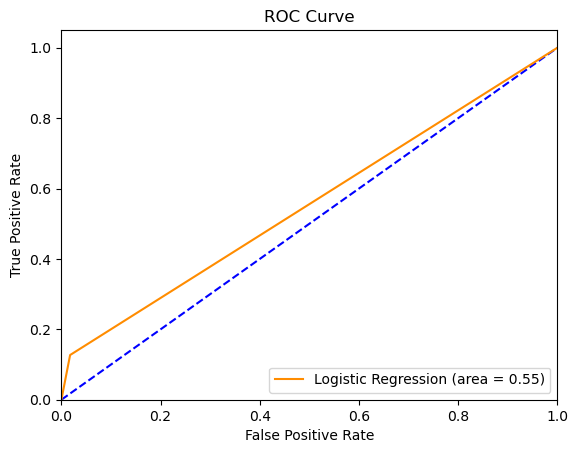

In [24]:
roc_curve(logreg,X_test,y_test)

###### Save Model

In [20]:
# save the model using pickle function 
import pickle
pickle.dump(logreg, open('../models/model1.pkl', 'wb'))

In [25]:
# load the saved model 
model = pickle.load(open('../models/model1.pkl', 'rb'))

In [26]:
# make predictions on the test data
model.predict(X_test)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

###### Dealing with Class Imbalance

In [27]:
# class imbalance method 1 
def run_model_bweights(X_train,X_test,y_train,y_test):
    global logreg
    logreg = LogisticRegression(random_state = 13,class_weight = 'balanced') # define class_weight parameter
    logreg.fit(X_train, y_train) # fit the model 
    global y_pred
    y_pred = logreg.predict(X_test) # predict on test data
    logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test)) # ROC AUC score
    print(classification_report(y_test, y_pred)) 
    print("The area under the curve is: %0.2f"%logit_roc_auc) # AUC curve

In [ ]:
run_model_bweights(X_train,X_test,y_train,y_test)

In [ ]:
# class imbalance method 2
def run_model_aweights(X_train,X_test,y_train,y_test,w):
    global logreg
    logreg = LogisticRegression(random_state = 13,class_weight=w) # define class_weight parameter
    logreg.fit(X_train, y_train) # fit the model 
    global y_pred
    y_pred = logreg.predict(X_test) # predict on test data
    logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))  # ROC AUC score
    print(classification_report(y_test, y_pred))
    print("The area under the curve is: %0.2f"%logit_roc_auc)  # AUC curve

In [ ]:
run_model_aweights(X_train,X_test,y_train,y_test,{0:90, 1:10})

In [28]:
# class imbalance method 3
def adjust_imbalance (X_train,y_train,class_col):
  from sklearn.utils import resample
  import pandas as pd
  X = pd.concat([X_train, y_train], axis=1)

  # separate the 2 classes
  class0 = X[X[class_col]==0]
  class1 = X[X[class_col]==1]

  # Case 1 - bootstraps from the minority class
  if len(class1)<len(class0):
    resampled = resample(class1,
                              replace=True, 
                              n_samples=len(class0), 
                              random_state=10) 
    resampled_df = pd.concat([resampled, class0])

  # Case 1 - ressamples from the majority class
  else:
    resampled = resample(class1,
                              replace=False, 
                              n_samples=len(class0), 
                              random_state=10) 
    resampled_df = pd.concat([resampled, class0])

  return resampled_df

In [ ]:
resampled_df = adjust_imbalance (X_train,y_train,class_col = 'churn')

In [ ]:
prepare_model(resampled_df,class_col = 'churn',cols_to_exclude=['customer_id','phone_no', 'year'])
run_model(X_train,X_test,y_train,y_test)

In [31]:
def prepare_model_smote(df,class_col,cols_to_exclude):
#Synthetic Minority Oversampling Technique. Generates new instances from existing minority cases that you supply as input. 

  cols=df.select_dtypes(include=np.number).columns.tolist() 
  X=df[cols]
  X = X[X.columns.difference([class_col])]
  X = X[X.columns.difference(cols_to_exclude)]
  y=df[class_col]
  global X_train, X_test, y_train, y_test
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
  sm = SMOTE(random_state=0, sampling_strategy=1.0)
  X_train, y_train = sm.fit_resample(X_train, y_train) 

In [ ]:
prepare_model_smote(df,class_col = 'churn',cols_to_exclude=['customer_id','phone_no', 'year'])
run_model(X_train,X_test,y_train,y_test)

In [ ]:
run_model(X_train,X_test,y_train,y_test)

###### Feature Selection

In [33]:
class_col = 'churn'
cols_to_exclude=['customer_id','phone_no', 'year']

# function for feature selection 
def var_threshold_selection(df,cols_to_exclude,class_col,threshold):


  cols=df.select_dtypes(include=np.number).columns.tolist() #finding all the numerical columns from the dataframe
  X=df[cols] #creating a dataframe only with the numerical columns
  X = X[X.columns.difference(cols_to_exclude)] #columns to exclude
  X = X[X.columns.difference([class_col])]
  ## Scaling variables
  scaler = preprocessing.StandardScaler().fit(X)
  X_scaled = scaler.transform(X)
  var_thr = VarianceThreshold(threshold = threshold) #Removing both constant and quasi-constant
  var_thr.fit(X_scaled)
  var_thr.get_support()

  global selected_cols
  selected_cols = X.columns[var_thr.get_support()]

  print("The selected features are: ")
  print(list(selected_cols))

In [34]:
var_threshold_selection(df,cols_to_exclude=['customer_id','phone_no', 'year'],class_col = 'churn',threshold=1)

NameError: name 'preprocessing' is not defined

In [ ]:
prepare_model(resampled_df,class_col = 'churn',cols_to_exclude=['customer_id','phone_no', 'year',
                                                                'gender', 'age',
                                                                'no_of_days_subscribed', 'multi_screen', 'mail_subscribed', 'minimum_daily_mins', 
                                                                'weekly_max_night_mins', 'videos_watched', 
                                                                'customer_support_calls', 'churn', 'gender_code', 'multi_screen_code',
                                                                'mail_subscribed_code'])
run_model(X_train,X_test,y_train,y_test)

In [36]:
# RFE for feature selection 
def rfe_selection(df,cols_to_exclude,class_col,model):
  cols=df.select_dtypes(include=np.number).columns.tolist() #finding all the numerical columns from the dataframe
  X=df[cols] #creating a dataframe only with the numerical columns
  X = X[X.columns.difference(cols_to_exclude)] #columns to exclude
  X = X[X.columns.difference([class_col])]
  y = df[class_col]

  rfe = RFE(model)
  rfe = rfe.fit(X, y) # fit the model 
  global selected_cols
  selected_cols = X.columns[rfe.support_]

  print("The selected features are: ")
  print(list(selected_cols))


In [ ]:
rfe_selection(df,class_col = 'churn',cols_to_exclude=['customer_id','phone_no', 'year'],model=logreg)

In [ ]:
prepare_model(resampled_df,class_col = 'churn',cols_to_exclude=['customer_id','phone_no', 'year',
                                                                'gender', 'age',
                                                                'no_of_days_subscribed', 'multi_screen', 'mail_subscribed', 
                                                                'weekly_max_night_mins', 
                                                                 'gender_code', 'multi_screen_code',
                                                                'mail_subscribed_code'])
run_model(X_train,X_test,y_train,y_test)